In [1]:
%load_ext autoreload

In [158]:
%autoreload 2
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import _init_paths
from easydict import EasyDict as edict
from block_gen import block_gen as bg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sim_knn import sim_knn as sknn
from mpl_toolkits.mplot3d import axes3d, Axes3D 

# Graph Sampling Overview

![Graph Summary](/home/kent/Documents/experiments/label_smoothing_simulation/report/figs/graph_sampling_overview.png)

## generate the block grid

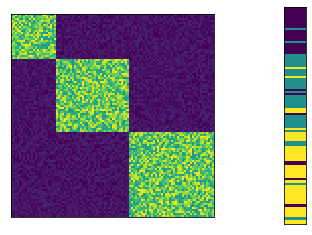

In [35]:
grid,l,gt = bg.generate_blockgrid(100,3,random=True,
                               bg_grid_noise=0.1,
                               label_noise=0.25)
fig,axs = bg.plot_blockgrid(grid,l)

## simulate binary operation with bernoulli

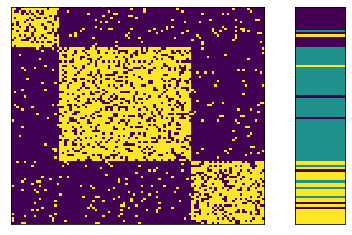

In [452]:
grid,l,gt = bg.generate_blockgrid(100,3,random=True,
                               bg_grid_noise=0.1,
                               label_noise=0.25)
bgrid = bg.binarize_grid_bernoulli(grid)
fig,axs = bg.plot_blockgrid(bgrid,l)

## simulate the knn on clean grid

[21 16 22 11  2  3  0 23 17 25]


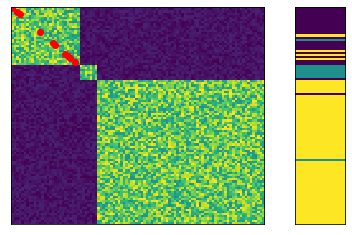

In [195]:
samples = sknn.pseudo_knn(grid,3,10)
print(samples)
fig,axs = bg.plot_blockgrid(grid,l)
axs[0].scatter(samples,samples,c='red')

## simulate the knn on the noisy grid

[ 8  0  6  2 43  3 64  7 29 54]


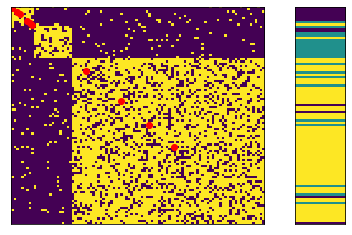

In [460]:
grid,l,gt = bg.generate_blockgrid(100,3,random=True,
                               bg_grid_noise=0.1,
                               label_noise=0.25)
bgrid = bg.binarize_grid_bernoulli(grid)
samples = sknn.pseudo_knn(bgrid,3,10)
print(samples)
fig,axs = bg.plot_blockgrid(bgrid,l)
axs[0].scatter(samples,samples,c='red')

## simulate the grid subsampling

(43, 43)

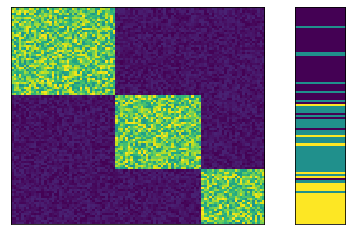

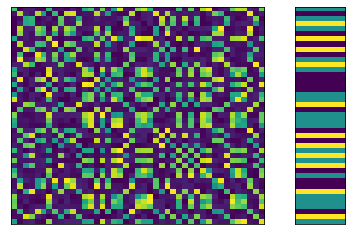

In [461]:
grid,l,gt = bg.generate_blockgrid(100,3,random=True,
                               bg_grid_noise=0.1,
                               label_noise=0.25)
fig,axs = bg.plot_blockgrid(grid,l)
subgrid,subset_idx = bg.subsample_grid(grid,'bernoulli',sort=False)
fig,axs = bg.plot_blockgrid(subgrid,l[subset_idx])
subgrid.shape

## Verify KNN is not impacted by random ordering; a correctness check of my code

This shows ordering of the elements does not impact KNN quality on subgraph.


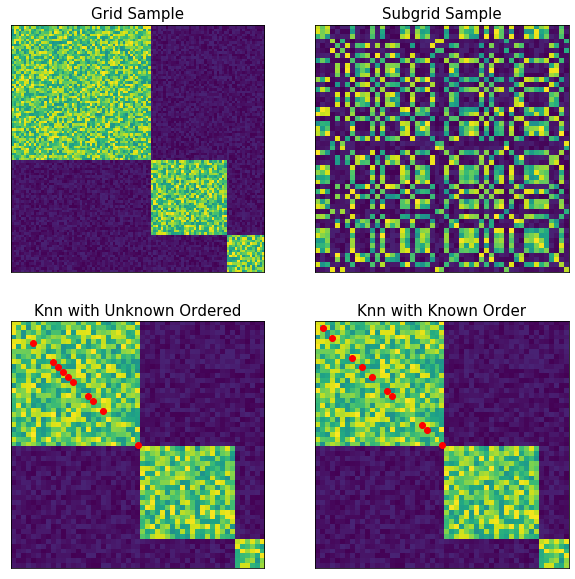

In [462]:
print("This shows ordering of the elements does not impact KNN quality on subgraph.")
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs = [ax1,ax2,ax3,ax4]


# create grid and subsampling
grid,l,gt = bg.generate_blockgrid(100,3,random=True,bg_grid_noise=0.1,label_noise=0.25)
#fig,axs = bg.plot_blockgrid(grid,l)
subgrid,subset_idx = bg.subsample_grid(grid,'bernoulli',sort=False)
#fig,axs = bg.plot_blockgrid(subgrid,l[subset_idx])
axs[0].imshow(grid)
axs[0].set_title("Grid Sample", fontsize=15)

axs[1].imshow(subgrid)
axs[1].set_title("Subgrid Sample", fontsize=15)


# knn and reordering
order_idx = np.argsort(subset_idx)
knn_target = order_idx[3]
knn_samples = sknn.pseudo_knn(subgrid,knn_target,10)
sorted_knn = bg.value_from_index(order_idx,knn_samples)
sorted_l = l[subset_idx][order_idx]
ssubgrid = bg.reoder_grid_by_rowvec(subgrid,order_idx)
#fig,axs = bg.plot_blockgrid(ssubgrid,sorted_l)
axs[2].imshow(ssubgrid)
axs[2].set_title("Knn with Unknown Ordered", fontsize=15)
knn_samples_on_sorted = sknn.pseudo_knn(ssubgrid,3,10)
#fig,axs = bg.plot_blockgrid(ssubgrid,sorted_l)
axs[3].imshow(ssubgrid)
axs[3].set_title("Knn with Known Order", fontsize=15)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('tight')
    
axs[2].scatter(sorted_knn,sorted_knn,c='red')
axs[3].scatter(knn_samples_on_sorted,knn_samples_on_sorted,c='red')
